In [1]:
import geoai

In [2]:
naip_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train.tif"
)
masks_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_building_masks.tif"

In [3]:
masks_path = geoai.download_file(masks_url)
naip_path = geoai.download_file(naip_url)

naip_building_masks.tif: 100%|██████████| 61.6k/61.6k [00:00<00:00, 1.12MB/s]
naip_train.tif: 100%|██████████| 12.1M/12.1M [00:00<00:00, 14.7MB/s]


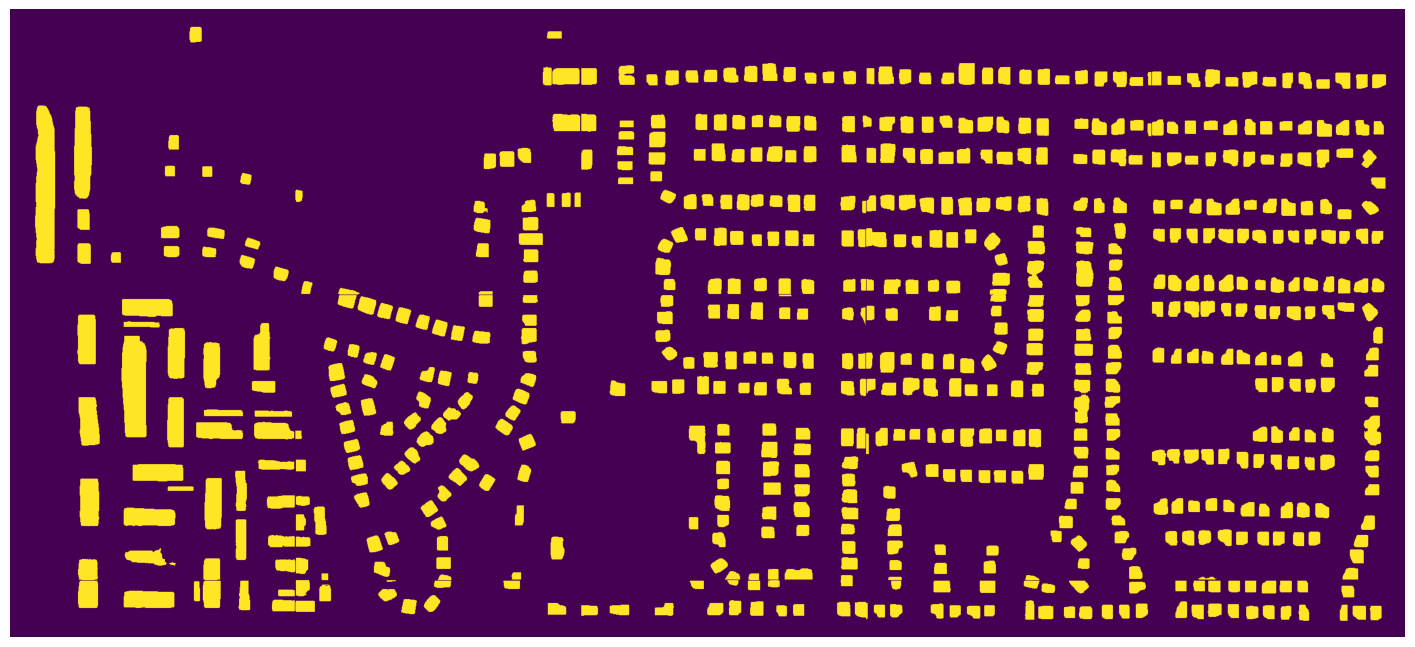

In [4]:
geoai.view_image(masks_path, figsize=(18, 10))

In [5]:
geoai.create_split_map(
    left_layer=masks_url,
    right_layer=naip_url,
    left_label="Building Masks",
    right_label="NAIP Image",
    left_args={
        "colormap": {"255": "#0000ff"},
        "opacity": 0.5,
    },
    basemap=naip_url,
)

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [6]:
gdf = geoai.raster_to_vector(masks_path)

In [9]:
geoai.view_vector_interactive(
    gdf,
    style_kwds={"style": {"color": "blue"}, "fillOpacity": 0.4},
    tiles=naip_url,
)

In [10]:
geoai.create_split_map(
    left_layer=gdf,
    right_layer=naip_url,
    left_label="Buildings",
    right_label="NAIP Imagery",
    left_args={"style": {"color": "blue"}, "fillOpacity": 0.4},
    basemap=naip_url,
)

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Regularization

In [ ]:
gdf_regularized = geoai.regularization(
    building_polygons=gdf,
    angle_tolerance=10,  # degrees within which angles will be regularized to 90 or 180 degrees
    simplify_tolerance=0.5,  # simplification tolerance in degrees
    orthogonalize=True,  # whether to orthogonalize the building footprints
    preserve_topology=True,  # whether to preserve topology
)

In [12]:
geoai.view_vector_interactive(
    gdf_regularized,
    style_kwds={"style": {"color": "blue"}, "fillOpacity": 0.4},
    tiles=naip_url,
)

In [13]:
geoai.create_split_map(
    left_layer=gdf_regularized,
    right_layer=naip_url,
    left_label="Regularized Buildings",
    right_label="NAIP Imagery",
    left_args={"style": {"color": "red"}, "fillOpacity": 0.4},
    basemap=naip_url,
)

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Hybrid Regularization

In [14]:
gdf_hybrid = geoai.hybrid_regularization(gdf)

In [15]:
geoai.view_vector_interactive(
    gdf_hybrid, style_kwds={"color": "green", "fillOpacity": 0.4}, tiles=naip_url
)

In [16]:
geoai.create_split_map(
    left_layer=gdf_regularized,
    right_layer=naip_url,
    left_label="Regularized Buildings",
    right_label="NAIP Imagery",
    left_args={"style": {"color": "green", "fillOpacity": 0.4}},
    basemap=naip_url,
)

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Adaptive regularization

In [17]:
gdf_adaptive = geoai.adaptive_regularization(
    building_polygons=gdf,
    simplify_tolerance=0.5,
    area_threshold=0.9,
    preserve_shape=True,
)

In [18]:
geoai.view_vector_interactive(
    gdf_adaptive, style_kwds={"color": "yellow", "fillOpacity": 0.4}, tiles=naip_url
)

In [19]:
geoai.create_split_map(
    left_layer=gdf_adaptive,
    right_layer=naip_url,
    left_label="Adaptive Regularization Buildings",
    right_label="NAIP Imagery",
    left_args={"style": {"color": "yellow", "fillOpacity": 0.4}},
    basemap=naip_url,
)

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [20]:
import leafmap.foliumap as leafmap

In [21]:
m = leafmap.Map()
m.add_basemap("SATELLITE")
m.add_gdf(gdf, layer_name="Original")
m.add_gdf(
    gdf_regularized, style={"color": "red", "fillOpacity": 0}, layer_name="Regularized"
)
m.add_gdf(gdf_hybrid, style={"color": "green", "fillOpacity": 0}, layer_name="Hybrid")
m.add_gdf(
    gdf_adaptive, style={"color": "yellow", "fillOpacity": 0}, layer_name="Adaptive"
)
legend = {
    "Original": "blue",
    "Regularized": "red",
    "Hybrid": "green",
    "Adaptive": "yellow",
}
m.add_legend(title="Building Footprints", legend_dict=legend)
m